In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
df=pd.read_csv('weight-height.csv')

In [5]:
df=df.iloc[:, :2]
df

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [6]:
df.shape

(10000, 2)

<Axes: xlabel='Height', ylabel='Count'>

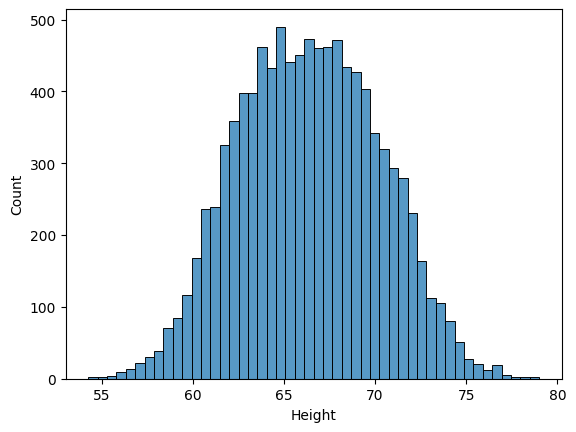

In [7]:
sns.histplot(df['Height'])

<Axes: ylabel='Height'>

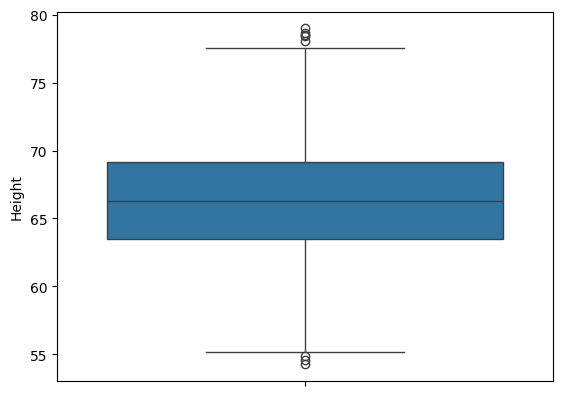

In [8]:
sns.boxplot(df['Height'])

In [9]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

## Outlier dectection using percentile

In [10]:
upper_limit=df['Height'].quantile(0.98)
lower_limit=df['Height'].quantile(0.02)

print("Upper Limit:", upper_limit)
print("Lower limit:", lower_limit )

Upper Limit: 73.98591718768152
Lower limit: 58.95993803762639


## trimming


In [24]:
df_trim=df[(df['Height']<=upper_limit) & (df['Height']>=lower_limit)]
df_trim.shape

(9600, 2)

## Winsorization

In [25]:
df_cap=np.where(df['Height']>=upper_limit, upper_limit-1, np.where(df['Height']<=lower_limit, lower_limit+1, df['Height']) )

In [27]:
df_cap.shape

(10000,)